# Using Machine Learning to Predictor Whether a Tumor is Benign or Malignant

In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Get data
df = pd.read_csv('./data/FP_breast_cancer_data_catcol.csv')

In [3]:
# Take a look at the data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_category
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


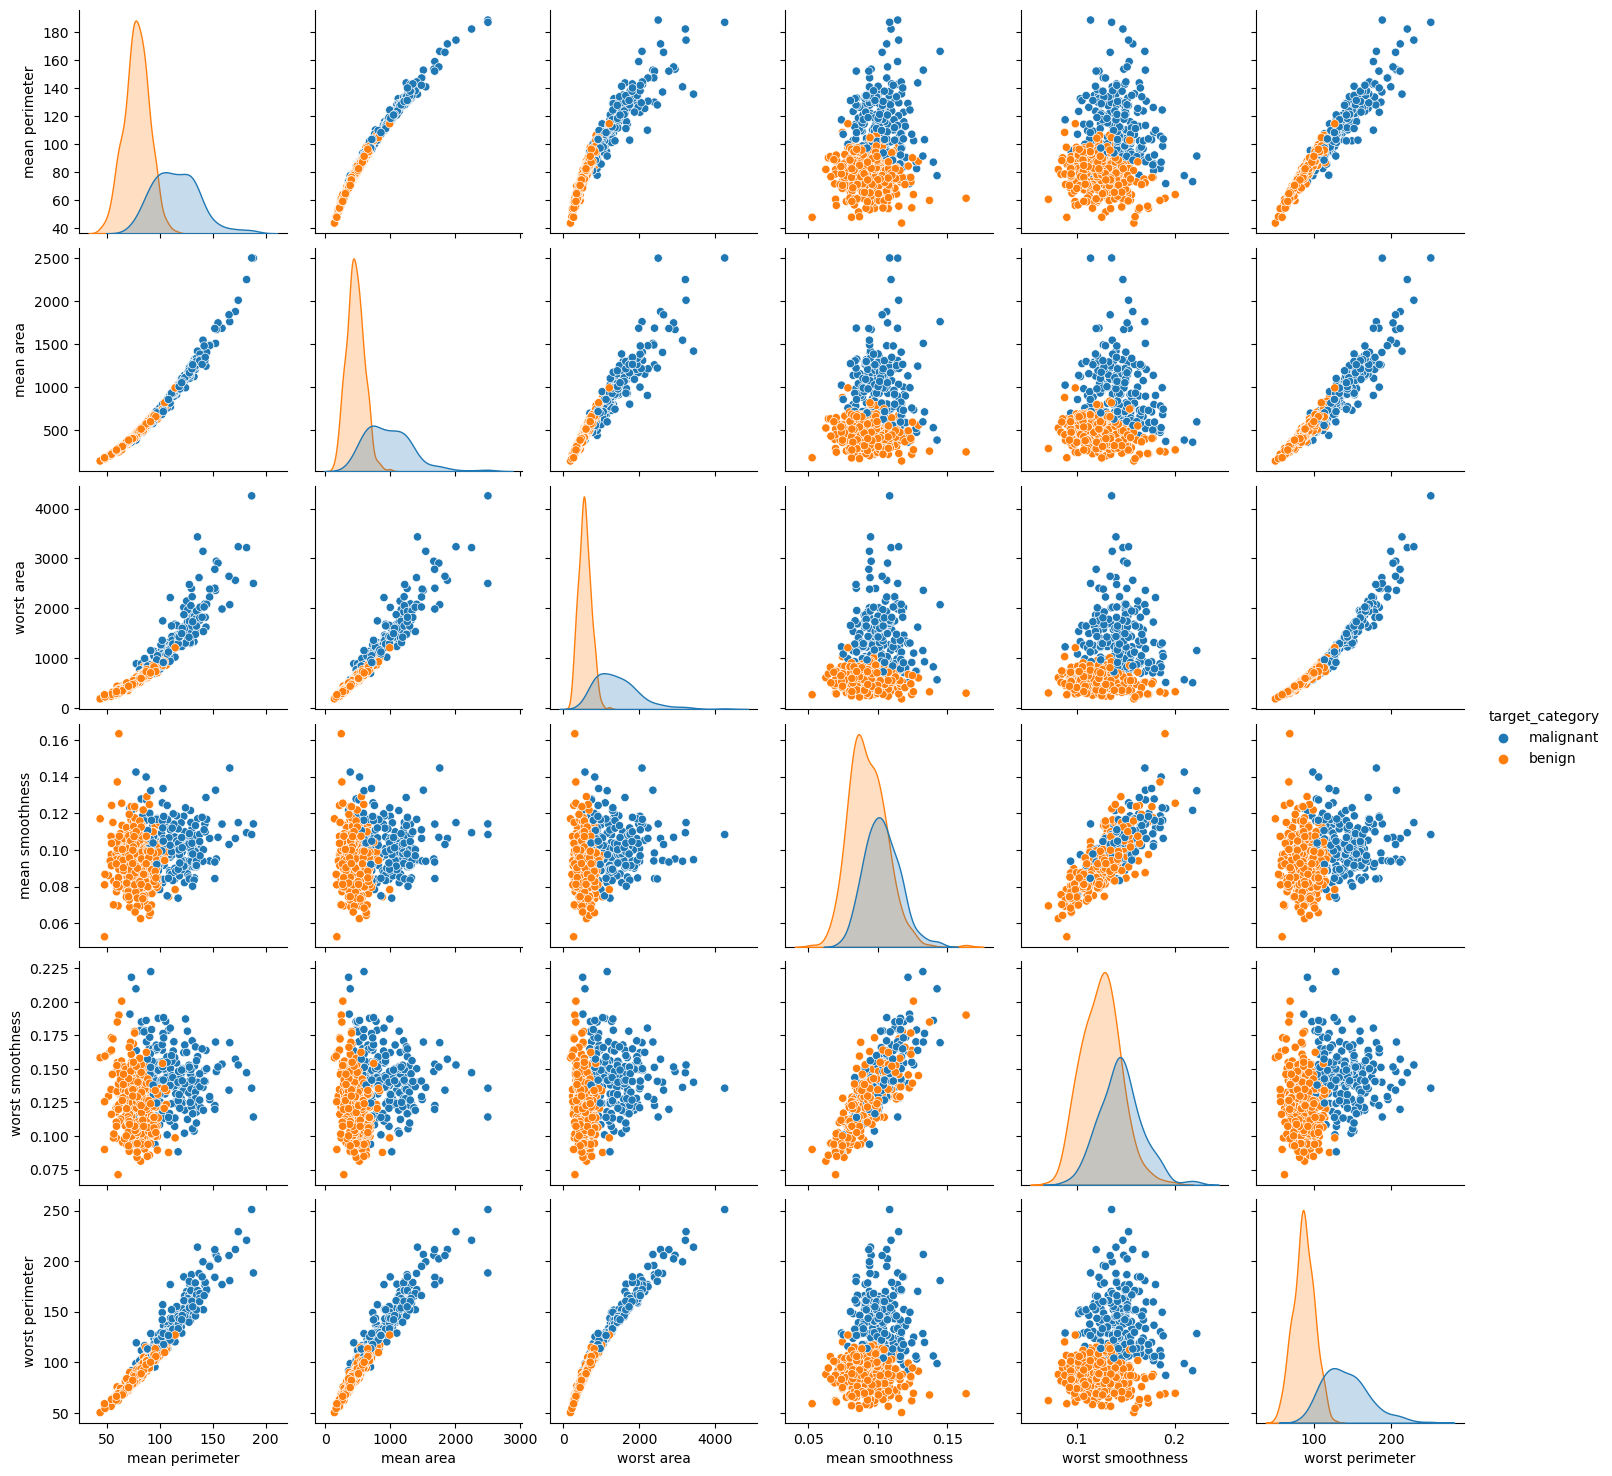

In [4]:
# get a sneak peek of how different variables correlate
sub_cols = ['mean perimeter', 'mean area', 'worst area',  'mean smoothness', 'worst smoothness', 'worst perimeter']
sns.pairplot(df, hue = 'target_category', vars = sub_cols)

In [5]:
# Split data into training and testing segments
X = df[['mean smoothness','worst perimeter']] # predictor matrix
y = df.target_category   # target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Algorithm 1 (K-Nearest Neighbors classifier with k=3)

In [6]:
# Make algorithm 1
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit algorithm
knn.fit(X_train, y_train)

# Predict new values
y_pred = knn.predict(X_test)

In [7]:
# Compare test data with predicted values
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

# Make classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

Accuracy Score: 0.92%
              precision    recall  f1-score   support

      benign       0.93      0.94      0.94        71
   malignant       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



## Algorithm 2 (Gaussian Naive Bayes Classifier)

In [8]:
# Make algorithm 2
gnb = GaussianNB()

# Fit algorithm
gnb.fit(X_train, y_train)

# Predict new values
y_pred = gnb.predict(X_test)

In [9]:
# Make a plot

In [10]:
# Compare test data with predicted values
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

# Make classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

Accuracy Score: 0.96%
              precision    recall  f1-score   support

      benign       0.95      1.00      0.97        71
   malignant       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## Perform PCA

In [11]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# pair plot to find which is best predictor
X = df[['mean concavity','worst area' ]] # predictor matrix
y = df.target_category   # target vector

# Split data into training and testing segments from PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

### Algorithm 1 (Nearest Neighbors) on PCA

In [12]:
# Make algorithm 1
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit algorithm
knn.fit(X_train, y_train)

# Predict new values
y_pred = knn.predict(X_test)

In [13]:
# Make a plot

In [14]:
# Compare test data with predicted values
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

# Make classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

Accuracy Score: 0.92%
              precision    recall  f1-score   support

      benign       0.94      0.94      0.94       108
   malignant       0.89      0.89      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



### Algorithm 2 (Gaussian Naive Bayes Classifier) on PCA

In [15]:
# Make algorithm 2
gnb = GaussianNB()

# Fit algorithm
gnb.fit(X_train, y_train)

# Predict new values
y_pred = gnb.predict(X_test)

In [16]:
# Make a plot

In [17]:
# Compare test data with predicted values
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

# Make  classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

Accuracy Score: 0.95%
              precision    recall  f1-score   support

      benign       0.93      1.00      0.96       108
   malignant       1.00      0.87      0.93        63

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



# Brief Summary

|Variables|Nearest Neighbors|Gaussian Naive Bayes Classifier
|-|-|-|
Mean Smoothness x Worst Perimeter	| 92% | 96%
Mean Smoothness x Worst Perimeter via PCA |92%| 95%

When comparing the 2 algorithms, I think we should use a Gaussian Naive Bayes Classifier on "Worst Smoothness" vs "Mean Perimeter" without PCA. As shown by the analyses summarized above, this method is able to predict whether a tumor is malignant or benign with 96% accuracy!